## Here I set out to do some basic preprocessing on the news titles and create a mapping of the top frequencies of particular phrases/words and then create a visualization and graph. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Import Neccesary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Load the Data

In [ ]:
# Load the data

years_df = pd.read_csv('Eluvio_DS_Challenge.csv', parse_dates=True, index_col='date_created')
years_df.head()

,time_created,up_votes,down_votes,title,over_18,author,category
date_created,,,,,,,
2008-01-25,1201232046,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
2008-01-25,1201232075,2,0,Japan resumes refuelling mission,False,polar,worldnews
2008-01-25,1201232523,3,0,US presses Egypt on Gaza border,False,polar,worldnews
2008-01-25,1201233290,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
2008-01-25,1201274720,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [ ]:
years_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 509236 entries, 2008-01-25 to 2016-11-22
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   up_votes      509236 non-null  int64 
 2   down_votes    509236 non-null  int64 
 3   title         509236 non-null  object
 4   over_18       509236 non-null  bool  
 5   author        509236 non-null  object
 6   category      509236 non-null  object
dtypes: bool(1), int64(3), object(3)
memory usage: 27.7+ MB


In [ ]:
years_df.index

DatetimeIndex(['2008-01-25', '2008-01-25', '2008-01-25', '2008-01-25',
               '2008-01-25', '2008-01-25', '2008-01-25', '2008-01-28',
               '2008-01-28', '2008-01-29',
               ...
               '2016-11-22', '2016-11-22', '2016-11-22', '2016-11-22',
               '2016-11-22', '2016-11-22', '2016-11-22', '2016-11-22',
               '2016-11-22', '2016-11-22'],
              dtype='datetime64[ns]', name='date_created', length=509236, freq=None)

In [ ]:
years_df.shape

(509236, 7)

# Found Most Common Words for 2008 and can be replicated for all the years

In [ ]:
df_2008 = months_df["2008-01-01":"2008-12-31"]

In [ ]:
# join the strings of every row
sentences_2008 = df_2008['title'].str.cat(sep = '')
sentences_2008

'Scores killed in Pakistan clashesJapan resumes refuelling missionUS presses Egypt on Gaza borderJump-start economy: Give health care to all Council of Europe bashes EU&UN terror blacklistHay presto! Farmer unveils the  illegal  mock-Tudor castle he tried to hide behind 40ft hay balesStrikes, Protests and Gridlock at the Poland-Ukraine BorderThe U.N. Mismanagement ProgramNicolas Sarkozy threatens to sue Ryanair US plans for missile shields in Polish town met with resistance [video]Archbishop of Canterbury calls for new law to punish  thoughtless or cruel  words -Times OnlineTop US Envoy: Violence In Kenya Is  Ethnic Cleansing Team building float to commemorate the Holocaust in Rio De Jinero has one hell of an idea.Migrant workers told to abandon Lunar New Year holiday plans Sarkozy, Girlfriend Sue Ryanair Over AdNicolas Sarkozy, Angela Merkel confirm their opposition to Turkey being EU membershipMass Evacuations Continue  in KenyaPoor Haitians Resort to Eating DirtEuropean Commission t

In [ ]:
print(len(sentences_2008))

1515401


# Tokenize

In [ ]:
from nltk.tokenize import word_tokenize

tok_2008 = word_tokenize(sentences_2008)
tok_2008

['Scores',
 'killed',
 'in',
 'Pakistan',
 'clashesJapan',
 'resumes',
 'refuelling',
 'missionUS',
 'presses',
 'Egypt',
 'on',
 'Gaza',
 'borderJump-start',
 'economy',
 ':',
 'Give',
 'health',
 'care',
 'to',
 'all',
 'Council',
 'of',
 'Europe',
 'bashes',
 'EU',
 '&',
 'UN',
 'terror',
 'blacklistHay',
 'presto',
 '!',
 'Farmer',
 'unveils',
 'the',
 'illegal',
 'mock-Tudor',
 'castle',
 'he',
 'tried',
 'to',
 'hide',
 'behind',
 '40ft',
 'hay',
 'balesStrikes',
 ',',
 'Protests',
 'and',
 'Gridlock',
 'at',
 'the',
 'Poland-Ukraine',
 'BorderThe',
 'U.N',
 '.',
 'Mismanagement',
 'ProgramNicolas',
 'Sarkozy',
 'threatens',
 'to',
 'sue',
 'Ryanair',
 'US',
 'plans',
 'for',
 'missile',
 'shields',
 'in',
 'Polish',
 'town',
 'met',
 'with',
 'resistance',
 '[',
 'video',
 ']',
 'Archbishop',
 'of',
 'Canterbury',
 'calls',
 'for',
 'new',
 'law',
 'to',
 'punish',
 'thoughtless',
 'or',
 'cruel',
 'words',
 '-Times',
 'OnlineTop',
 'US',
 'Envoy',
 ':',
 'Violence',
 'In',
 'Ke

# Remove Punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
tok_2008 = [char for char in tok_2008 if char not in string.punctuation]
tok_2008

['Scores',
 'killed',
 'in',
 'Pakistan',
 'clashesJapan',
 'resumes',
 'refuelling',
 'missionUS',
 'presses',
 'Egypt',
 'on',
 'Gaza',
 'borderJump-start',
 'economy',
 'Give',
 'health',
 'care',
 'to',
 'all',
 'Council',
 'of',
 'Europe',
 'bashes',
 'EU',
 'UN',
 'terror',
 'blacklistHay',
 'presto',
 'Farmer',
 'unveils',
 'the',
 'illegal',
 'mock-Tudor',
 'castle',
 'he',
 'tried',
 'to',
 'hide',
 'behind',
 '40ft',
 'hay',
 'balesStrikes',
 'Protests',
 'and',
 'Gridlock',
 'at',
 'the',
 'Poland-Ukraine',
 'BorderThe',
 'U.N',
 'Mismanagement',
 'ProgramNicolas',
 'Sarkozy',
 'threatens',
 'to',
 'sue',
 'Ryanair',
 'US',
 'plans',
 'for',
 'missile',
 'shields',
 'in',
 'Polish',
 'town',
 'met',
 'with',
 'resistance',
 'video',
 'Archbishop',
 'of',
 'Canterbury',
 'calls',
 'for',
 'new',
 'law',
 'to',
 'punish',
 'thoughtless',
 'or',
 'cruel',
 'words',
 '-Times',
 'OnlineTop',
 'US',
 'Envoy',
 'Violence',
 'In',
 'Kenya',
 'Is',
 'Ethnic',
 'Cleansing',
 'Team',
 

# Remove Stop Words

In [ ]:
from nltk.corpus import stopwords

# remove stopwords
stop = stopwords.words('english')
tok_2008 = [token for token in tok_2008 if token not in stop]
tok_2008

['Scores',
 'killed',
 'Pakistan',
 'clashesJapan',
 'resumes',
 'refuelling',
 'missionUS',
 'presses',
 'Egypt',
 'Gaza',
 'borderJump-start',
 'economy',
 'Give',
 'health',
 'care',
 'Council',
 'Europe',
 'bashes',
 'EU',
 'UN',
 'terror',
 'blacklistHay',
 'presto',
 'Farmer',
 'unveils',
 'illegal',
 'mock-Tudor',
 'castle',
 'tried',
 'hide',
 'behind',
 '40ft',
 'hay',
 'balesStrikes',
 'Protests',
 'Gridlock',
 'Poland-Ukraine',
 'BorderThe',
 'U.N',
 'Mismanagement',
 'ProgramNicolas',
 'Sarkozy',
 'threatens',
 'sue',
 'Ryanair',
 'US',
 'plans',
 'missile',
 'shields',
 'Polish',
 'town',
 'met',
 'resistance',
 'video',
 'Archbishop',
 'Canterbury',
 'calls',
 'new',
 'law',
 'punish',
 'thoughtless',
 'cruel',
 'words',
 '-Times',
 'OnlineTop',
 'US',
 'Envoy',
 'Violence',
 'In',
 'Kenya',
 'Is',
 'Ethnic',
 'Cleansing',
 'Team',
 'building',
 'float',
 'commemorate',
 'Holocaust',
 'Rio',
 'De',
 'Jinero',
 'one',
 'hell',
 'idea.Migrant',
 'workers',
 'told',
 'abando

# Remove words less than four letters

In [ ]:
# remove words less than four letters
tok_2008 = [word for word in tok_2008 if len(word) >= 4]
tok_2008

['Scores',
 'killed',
 'Pakistan',
 'clashesJapan',
 'resumes',
 'refuelling',
 'missionUS',
 'presses',
 'Egypt',
 'Gaza',
 'borderJump-start',
 'economy',
 'Give',
 'health',
 'care',
 'Council',
 'Europe',
 'bashes',
 'terror',
 'blacklistHay',
 'presto',
 'Farmer',
 'unveils',
 'illegal',
 'mock-Tudor',
 'castle',
 'tried',
 'hide',
 'behind',
 '40ft',
 'balesStrikes',
 'Protests',
 'Gridlock',
 'Poland-Ukraine',
 'BorderThe',
 'Mismanagement',
 'ProgramNicolas',
 'Sarkozy',
 'threatens',
 'Ryanair',
 'plans',
 'missile',
 'shields',
 'Polish',
 'town',
 'resistance',
 'video',
 'Archbishop',
 'Canterbury',
 'calls',
 'punish',
 'thoughtless',
 'cruel',
 'words',
 '-Times',
 'OnlineTop',
 'Envoy',
 'Violence',
 'Kenya',
 'Ethnic',
 'Cleansing',
 'Team',
 'building',
 'float',
 'commemorate',
 'Holocaust',
 'Jinero',
 'hell',
 'idea.Migrant',
 'workers',
 'told',
 'abandon',
 'Lunar',
 'Year',
 'holiday',
 'plans',
 'Sarkozy',
 'Girlfriend',
 'Ryanair',
 'Over',
 'AdNicolas',
 'Sark

In [ ]:
len(tok_2008)

146103

# Get Frequency of Words

In [ ]:
import operator
freq_dis_2008={}
for tok in tok_2008:
    if tok in freq_dis_2008:
        freq_dis_2008[tok]+= 1
    else:
        freq_dis_2008[tok]=1
        
# We want to sort this dictionary on values ( freq in this case )

sorted_freq_2008 = sorted(freq_dis_jan.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_2008[:25])

[('Sarkozy', 3), ('Ryanair', 2), ('plans', 2), ('Scores', 1), ('killed', 1), ('Pakistan', 1), ('clashesJapan', 1), ('resumes', 1), ('refuelling', 1), ('missionUS', 1), ('presses', 1), ('Egypt', 1), ('Gaza', 1), ('borderJump-start', 1), ('economy', 1), ('Give', 1), ('health', 1), ('care', 1), ('Council', 1), ('Europe', 1), ('bashes', 1), ('terror', 1), ('blacklistHay', 1), ('presto', 1), ('Farmer', 1)]


In [ ]:
freq_2008_df = pd.DataFrame(sorted_freq_2008[:25],
                    columns=['Word', 'Frequency']).set_index('Word')

freq_2008_df.to_csv('freq_2008.csv')

# Create Word Cload and Graph Visualizations

In [ ]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

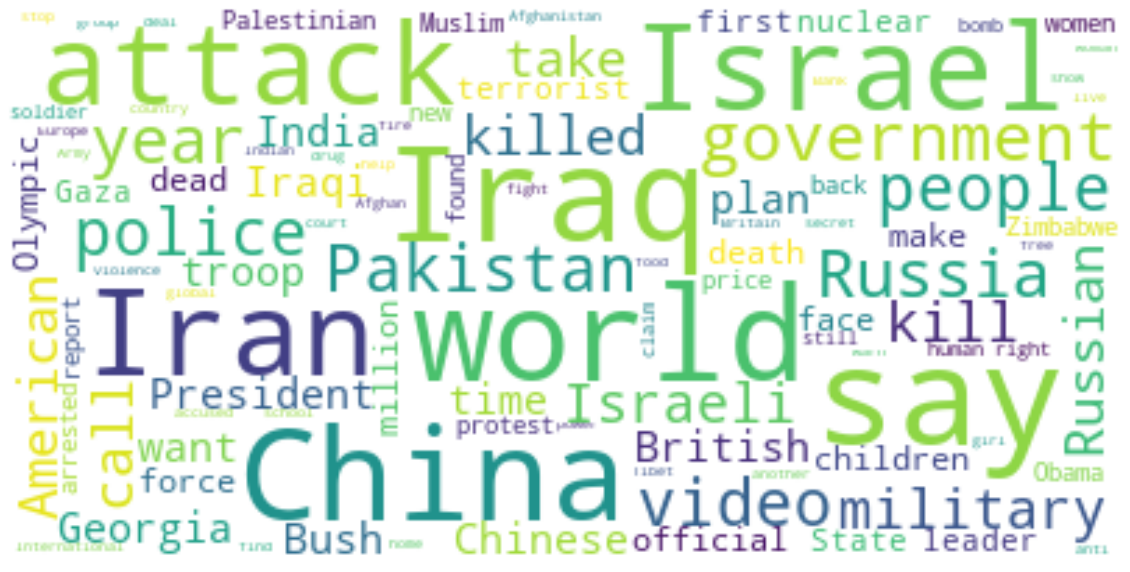

In [ ]:
plt.figure(figsize=(20,20))


wc = WordCloud(max_font_size=50, max_words=100, background_color="white")
wordcloud_2008 = wc.generate_from_text(' '.join(tok_2008))

plt.imshow(wordcloud_2008, interpolation="bilinear")
plt.axis("off")
plt.show()

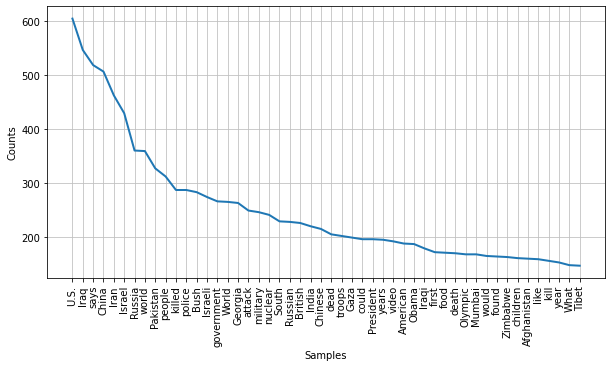

In [ ]:
plt.figure(figsize=(10, 5))
Freq_dist_nltk=nltk.FreqDist(tok_2008)
Freq_dist_nltk.plot(50, cumulative=False)